In [1]:
from tqdm import tqdm
import pandas as pd
import plotly.express as px

from risk_detection.utils import get_risk_section_sentiment_files
from risk_detection.analysis.keyword_extraction import get_keywords

In [2]:
sentiment_files = get_risk_section_sentiment_files()

In [3]:
total_count = pd.Series({'neutral': 0, 'negative': 0, 'positive': 0})

for sent_file in tqdm(sentiment_files):
    df = pd.read_pickle(sent_file)
    counts = df.prediction.value_counts()
    if not ('neutral' in counts.index and 'positive' in counts.index and 'negative' in counts.index):
        continue
    
    if (total_count + counts).isna().any():
        import pdb; pdb.set_trace()
    
    total_count += counts
    #import pdb; pdb.set_trace()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32718/32718 [01:43<00:00, 316.05it/s]


### Total number of sentences with neutral, negative and positive sentiment in the Risk Section of the reports:-

In [4]:
print(total_count)

neutral     4628047
negative    2472717
positive     506528
dtype: int64


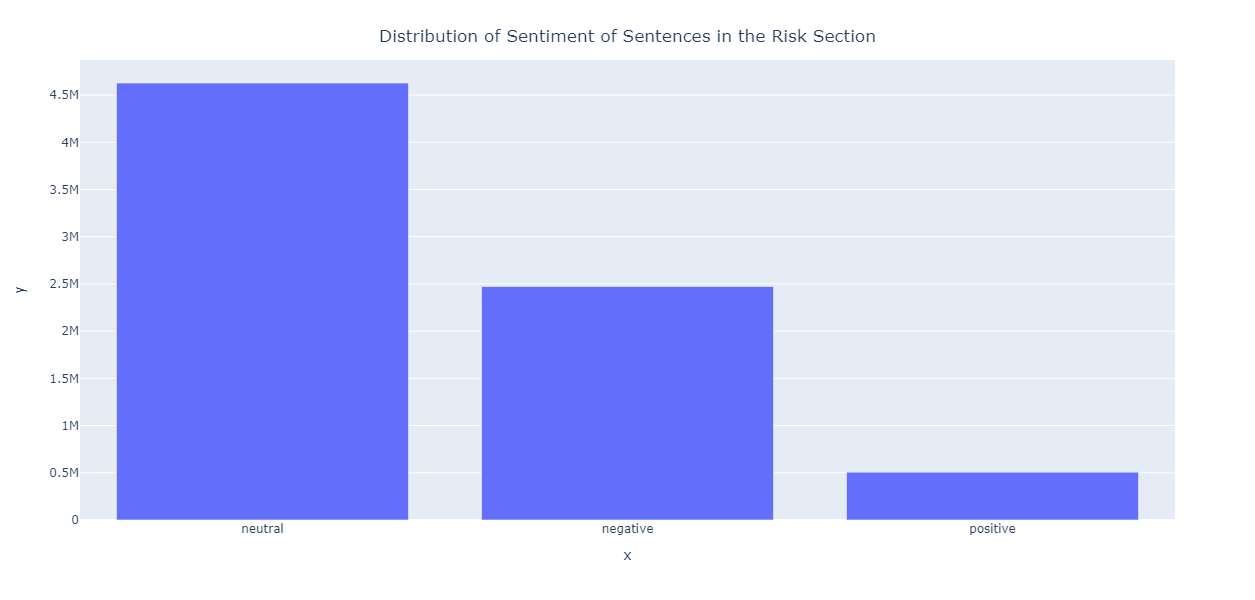

In [18]:
fig = px.bar(x=total_count.index, y=total_count.values, width=800, height=600)
fig.update_layout(
    title={
        'text': 'Distribution of Sentiment of Sentences in the Risk Section',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
fig.show()

### Example of Sentences with different sentiments.

In [19]:
df = pd.read_pickle(sentiment_files[0])

In [57]:
print('Example of a sentences labelled as a "neutral" sentence.')
print('1: ' + df.loc[df.prediction == 'neutral', 'sentence'].loc[32])
print('2: ' + df.loc[df.prediction == 'neutral', 'sentence'].loc[35])
print('3: ' + df.loc[df.prediction == 'neutral', 'sentence'].loc[41])

Example of a sentences labelled as a "neutral" sentence.
1: Our profitability depends, to a material extent, on the performance of Contracts that we purchase.
2: In the event of a default, the collateral value of the financed vehicle usually does not cover the outstanding loan balance and costs of recovery.
3: Although we believe we have been successful in developing and maintaining such relationships, such relationships are not exclusive, and many of them are not longstanding.


In [48]:
print('Example of a sentences labelled as "negative" sentences.')
print('1: ' + df.loc[df.prediction == 'negative', 'sentence'].loc[16])
print('2: ' + df.loc[df.prediction == 'negative', 'sentence'].loc[60])
print('3: ' + df.loc[df.prediction == 'negative', 'sentence'].loc[61])

Example of a sentences labelled as "negative" sentences.
1: If our lender accelerates our debt payments, our assets may not be sufficient to fully repay the debt.
2: During periods of economic slowdown or recession, decreased auction proceeds resulting from the depressed prices at which used automobiles may be sold will result in our experiencing higher credit losses.
3: An increase in market interest rates may reduce our profitability.


In [55]:
print('Example of a sentences labelled as a "positive" sentence.')
print('1: ' + df.loc[df.prediction == 'positive', 'sentence'].loc[38])
print('2: ' + df.loc[df.prediction == 'positive', 'sentence'].loc[42])
print('3: ' + df.loc[df.prediction == 'positive', 'sentence'].loc[66])

Example of a sentences labelled as a "positive" sentence.
1: We would similarly attempt to mitigate the high credit risks associated with these loans, although no assurances can be given that we would be able to do so.
2: There can be no assurances that we will be successful in maintaining such relationships or increasing the number of dealers with whom we do business, or that our existing dealer base will continue to generate a volume of Contracts comparable to the volume of such Contracts historically generated by such dealers.
3: Each of these agreements effectively converts a portion of our floating-rate debt to a fixed-rate, thus reducing the impact of interest rate changes on our interest expense.


In [59]:
df.prediction.value_counts()

neutral     85
negative    28
positive    11
Name: prediction, dtype: int64

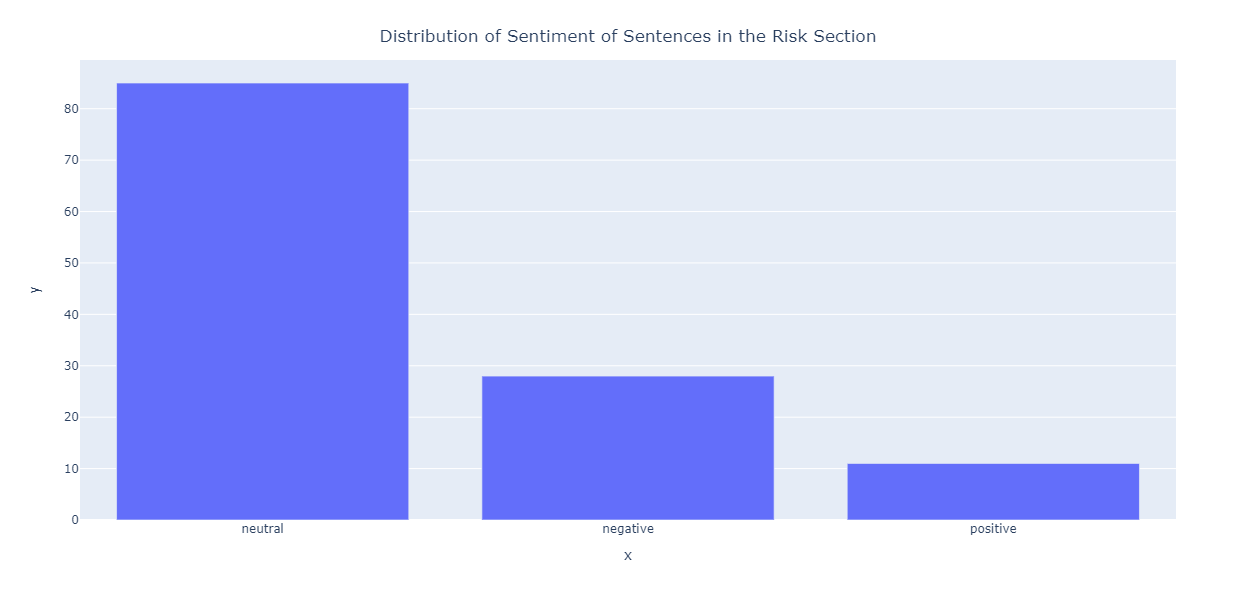

In [61]:
count = df.prediction.value_counts()
fig = px.bar(x=count.index, y=count.values, width=800, height=600)
fig.update_layout(
    title={
        'text': 'Distribution of Sentiment of Sentences in the Risk Section',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
fig.show()